In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datos_final.csv')

In [90]:
df['recaudo'][20]

632429977432.0

In [92]:
df[['Año','tasa_desempleo']]

,Año,tasa_desempleo
0,2000,16.69
1,2001,13.84
2,2002,15.77
3,2003,12.19
4,2004,12.07
5,2005,10.33
6,2006,11.78
7,2007,9.89
8,2008,10.61
9,2009,11.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        21 non-null     int64  
 1   recaudo                    21 non-null     object 
 2   recaudo_1000000000         21 non-null     object 
 3   IPVU_real_total            21 non-null     float64
 4   IPVU_real_medellin         21 non-null     float64
 5   IPVU_nom_total             21 non-null     object 
 6   IPVU_nom_medellin          21 non-null     object 
 7   IPVU_real_VIS              21 non-null     float64
 8   IPVU_real_noVIS            21 non-null     float64
 9   IPVU_nom_VIS               21 non-null     object 
 10  IPVU_nom_noVIS             21 non-null     object 
 11  PIB                        21 non-null     float64
 12  PIB_variacion_total_anual  21 non-null     float64
 13  PIB_ph_variacion_anual     21 non-null     object 
 

In [8]:
#df['recaudo'] = df['recaudo'].str.replace(',','')
#df['recaudo'] = df['recaudo'].str.replace('$','').apply(lambda x:x.strip()).astype(float)

df['recaudo_1000000000'] = df['recaudo_1000000000'].str.replace(',','')
df['recaudo_1000000000'] = df['recaudo_1000000000'].str.replace('$','').apply(lambda x:x.strip()).astype(float)

df['IPVU_nom_total'] = df['IPVU_nom_total'].str.replace(',','').apply(lambda x:x.strip()).astype(float)
df['IPVU_nom_medellin'] = df['IPVU_nom_medellin'].str.replace(',','').apply(lambda x:x.strip()).astype(float)

df['IPVU_nom_VIS'] = df['IPVU_nom_VIS'].str.replace(',','').apply(lambda x:x.strip()).astype(float)
df['IPVU_nom_noVIS'] = df['IPVU_nom_noVIS'].str.replace(',','').apply(lambda x:x.strip()).astype(float)

df['PIB_ph_variacion_anual'] = df['PIB_ph_variacion_anual'].str.replace('(','').str.replace(')','').apply(lambda x:x.strip()).astype(float)

df['DTF'] = df['DTF'].str.replace('%','').apply(lambda x:x.strip()).astype(float)

df['tasa_interv_br'] = df['tasa_interv_br'].str.replace('%','').apply(lambda x:x.strip()).astype(float)

df['cambio_trm'] = df['cambio_trm'].str.replace(',','').apply(lambda x:x.strip()).astype(float)

df['tasa_int_real'] = df['tasa_int_real'].str.replace('%','').apply(lambda x:x.strip()).astype(float)

df['var_anual_pib'] = df['var_anual_pib'].str.replace('%','').apply(lambda x:x.strip()).astype(float)


/home/david/Documents/studies/name_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/home/david/Documents/studies/name_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Año                        21 non-null     int64         
 1   recaudo                    21 non-null     float64       
 2   recaudo_1000000000         21 non-null     float64       
 3   IPVU_real_total            21 non-null     float64       
 4   IPVU_real_medellin         21 non-null     float64       
 5   IPVU_nom_total             21 non-null     float64       
 6   IPVU_nom_medellin          21 non-null     float64       
 7   IPVU_real_VIS              21 non-null     float64       
 8   IPVU_real_noVIS            21 non-null     float64       
 9   IPVU_nom_VIS               21 non-null     float64       
 10  IPVU_nom_noVIS             21 non-null     float64       
 11  PIB                        21 non-null     float64       
 12  PIB_variac

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt

In [42]:
df['date'] = pd.to_datetime(df['Año'],format='%Y')

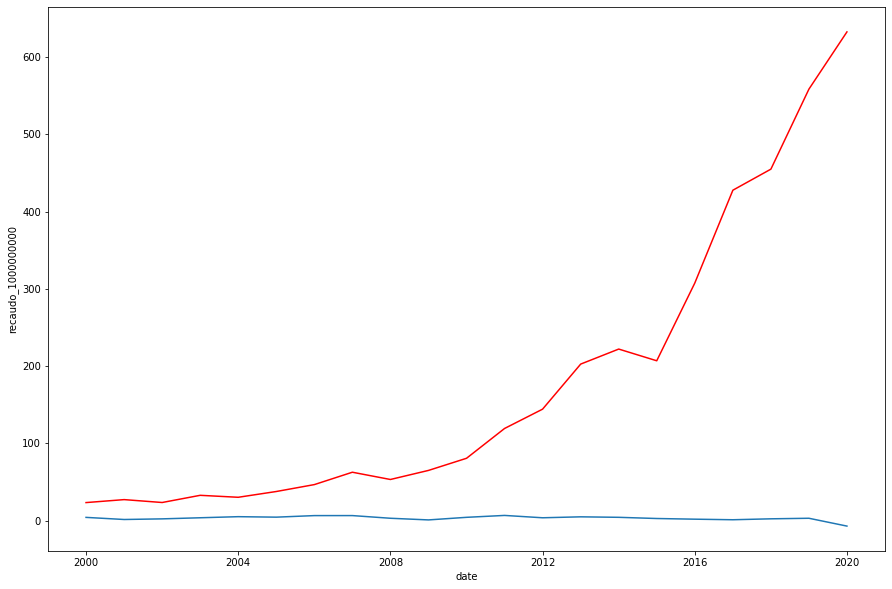

In [55]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df,x='date',y='recaudo_1000000000',color='red')
sns.lineplot(data=df,x='date',y='var_anual_pib');

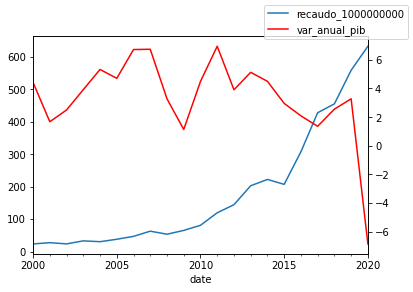

In [50]:
ax = df.plot(x="date", y="recaudo_1000000000", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="var_anual_pib", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

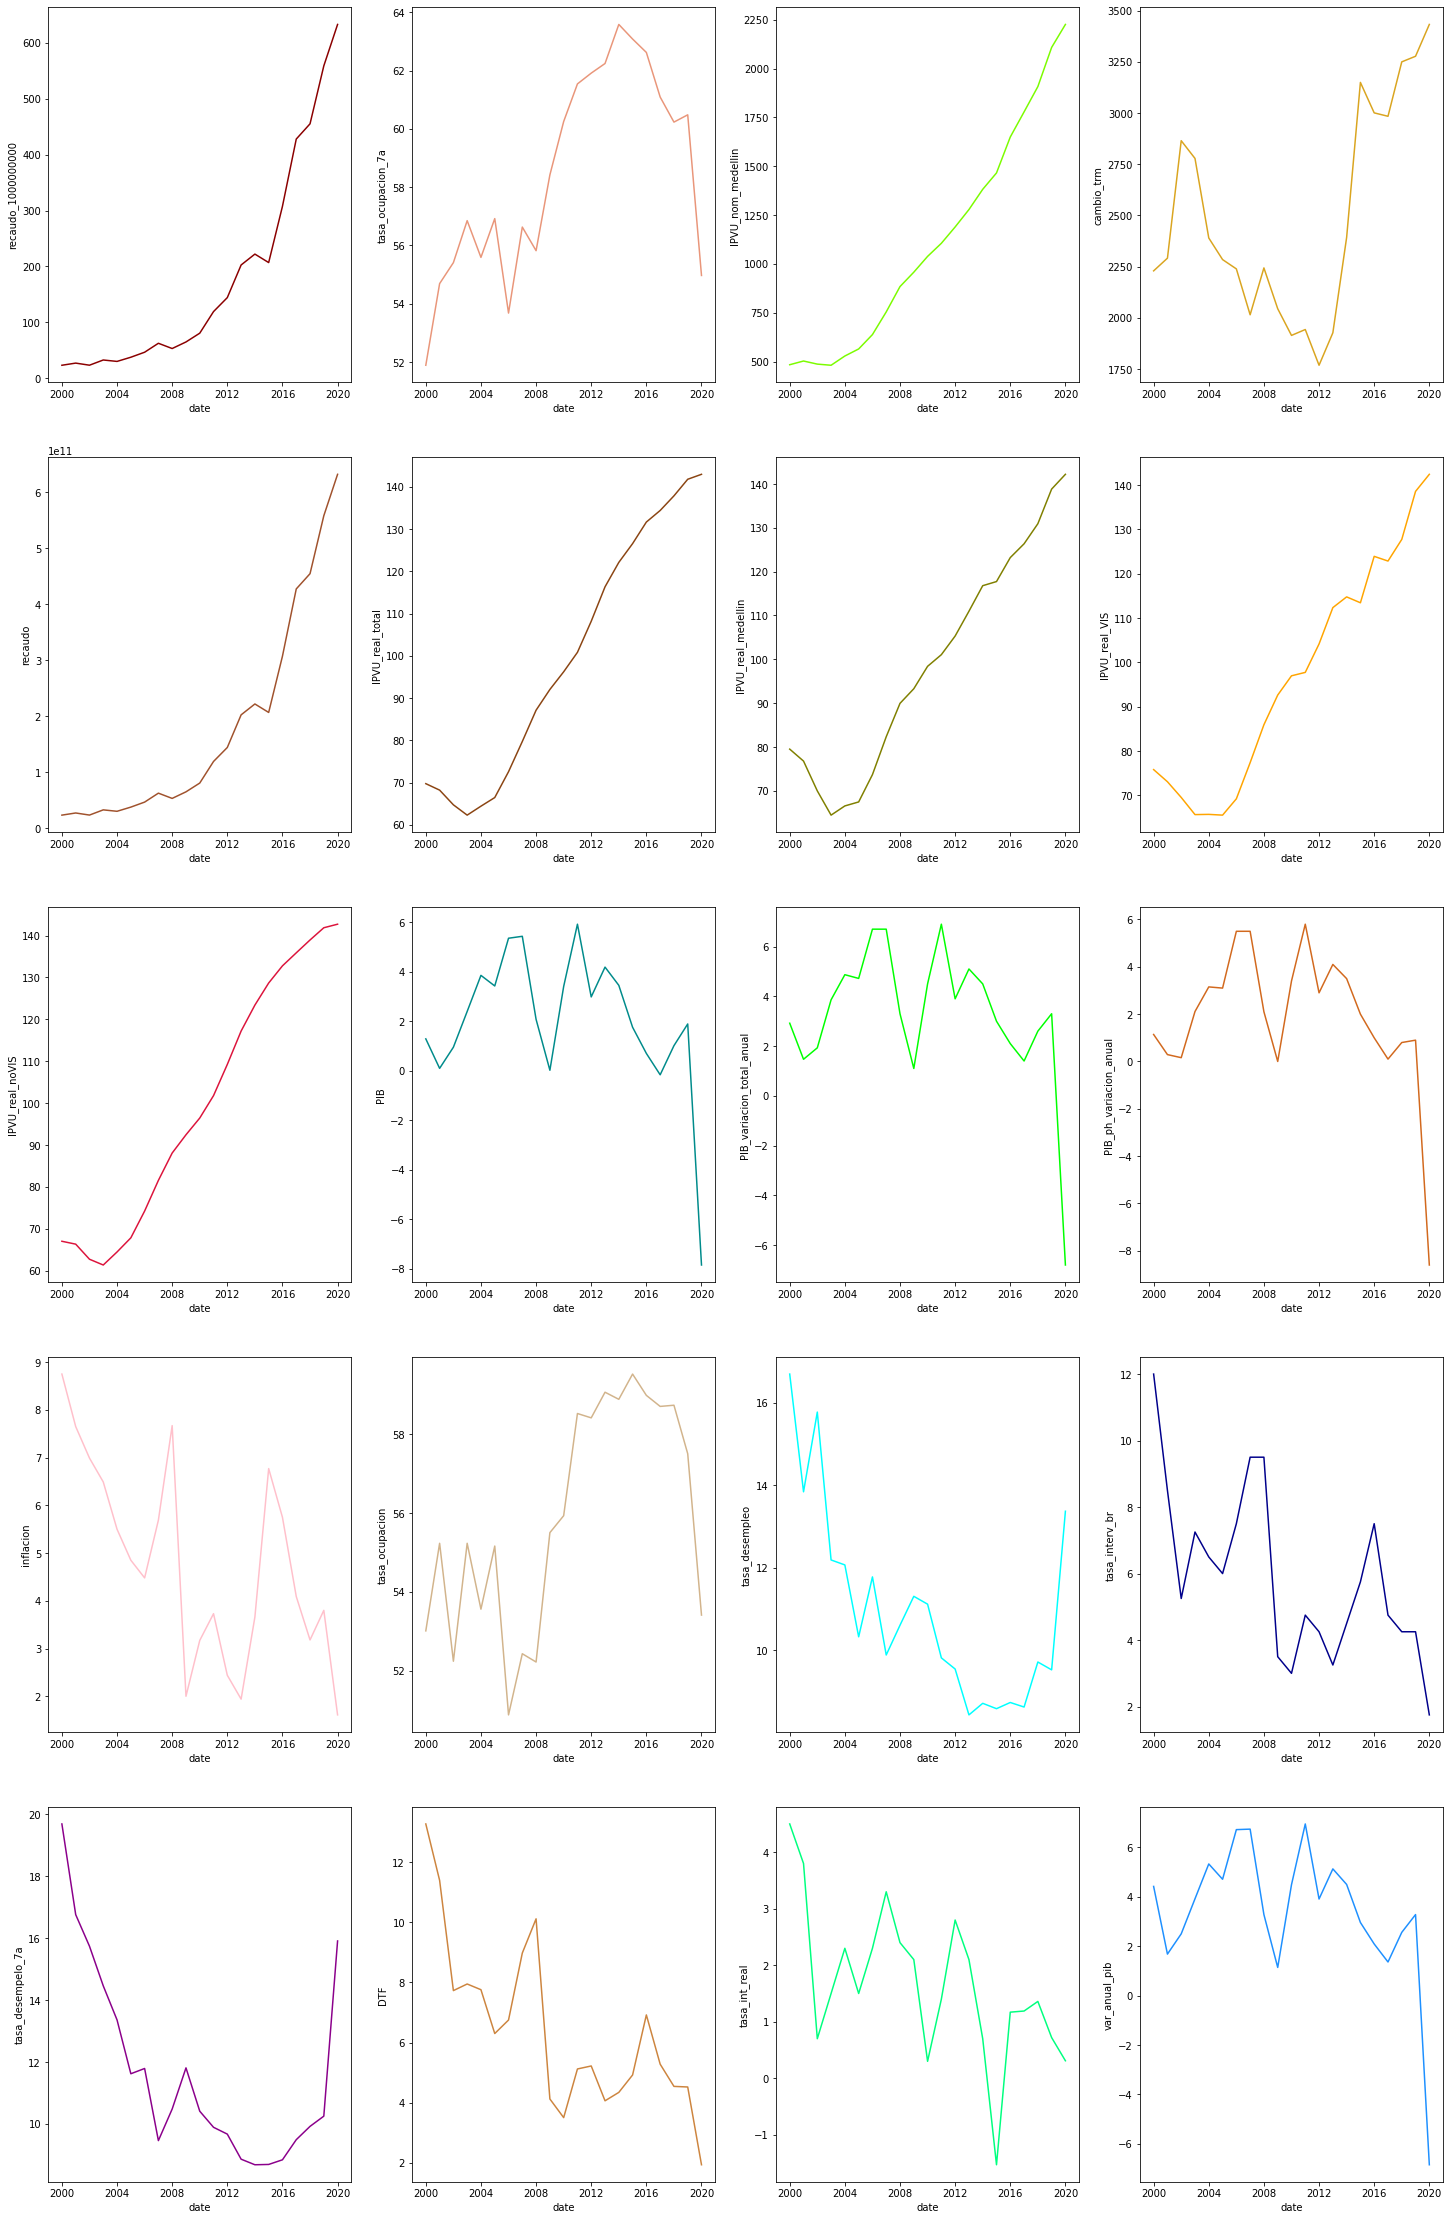

In [86]:
plt.figure(figsize=(25,40))
plt.subplot(5,4,1)
sns.lineplot(data=df,x='date',y = 'recaudo_1000000000',color='darkred')
plt.subplot(5,4,2)
sns.lineplot(data=df,x='date',y = 'tasa_ocupacion_7a',color='darksalmon')
plt.subplot(5,4,3)
sns.lineplot(data=df,x='date',y = 'IPVU_nom_medellin',color='lawngreen')
plt.subplot(5,4,4)
sns.lineplot(data=df,x='date',y = 'cambio_trm',color='goldenrod')
plt.subplot(5,4,5)
sns.lineplot(data=df,x='date',y = 'recaudo',color='sienna')
plt.subplot(5,4,6)
sns.lineplot(data=df,x='date',y = 'IPVU_real_total',color='saddlebrown')
plt.subplot(5,4,7)
sns.lineplot(data=df,x='date',y = 'IPVU_real_medellin',color='olive')
plt.subplot(5,4,8)
sns.lineplot(data=df,x='date',y = 'IPVU_real_VIS',color='orange')
plt.subplot(5,4,9)
sns.lineplot(data=df,x='date',y = 'IPVU_real_noVIS',color='crimson')
plt.subplot(5,4,10)
sns.lineplot(data=df,x='date',y = 'PIB',color='darkcyan')
plt.subplot(5,4,11)
sns.lineplot(data=df,x='date',y = 'PIB_variacion_total_anual',color='lime')
plt.subplot(5,4,12)
sns.lineplot(data=df,x='date',y = 'PIB_ph_variacion_anual',color='chocolate')
plt.subplot(5,4,13)
sns.lineplot(data=df,x='date',y = 'inflacion',color='pink')
plt.subplot(5,4,14)
sns.lineplot(data=df,x='date',y = 'tasa_ocupacion',color='tan')
plt.subplot(5,4,15)
sns.lineplot(data=df,x='date',y = 'tasa_desempleo',color='aqua')
plt.subplot(5,4,16)
sns.lineplot(data=df,x='date',y = 'tasa_interv_br',color='darkblue')
plt.subplot(5,4,17)
sns.lineplot(data=df,x='date',y = 'tasa_desempelo_7a',color='darkmagenta')
plt.subplot(5,4,18)
sns.lineplot(data=df,x='date',y = 'DTF',color='peru')
plt.subplot(5,4,19)
sns.lineplot(data=df,x='date',y = 'tasa_int_real',color='springgreen')
plt.subplot(5,4,20)
sns.lineplot(data=df,x='date',y = 'var_anual_pib',color='dodgerblue');